In [4]:
import btrack
from skimage import io
import numpy as np

import napari

from matplotlib import pyplot as plt

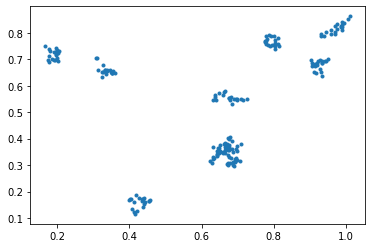

In [5]:
# We define a list of positions we want to track later
num_objects = 10 # number of objects
num_frame = 20 # number of time points
pts = [] # list of set of coordinates
for k in range(num_frame):
    if k==0:
        pts.append(np.hstack([np.random.rand(10,2), np.zeros((10,1))]))
    else:
        pts.append(pts[k-1]+np.hstack([0.01*np.random.randn(10,2), np.ones((10,1))]))
        
localizations = np.concatenate(pts)
plt.plot(localizations[:,0], localizations[:,1],'.')

In [6]:
from urllib.request import urlretrieve
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

url = 'https://raw.githubusercontent.com/quantumjot/BayesianTracker/7d80399db64af4723c1da2381a22d9910e1ba7c8/models/cell_config.json'
config = '../cell_config.json'
urlretrieve(url, config)

('../cell_config.json', <http.client.HTTPMessage at 0x7fc0d69d8820>)

In [7]:

config = '../cell_config.json'

localizations

array([[ 0.81052116,  0.75919015,  0.        ],
       [ 0.63313787,  0.32537618,  0.        ],
       [ 0.67695811,  0.55453851,  0.        ],
       [ 0.31120524,  0.70544226,  0.        ],
       [ 0.42191025,  0.12534215,  0.        ],
       [ 0.92712566,  0.69596742,  0.        ],
       [ 0.20028182,  0.70346872,  0.        ],
       [ 0.67992135,  0.40620656,  0.        ],
       [ 0.9308358 ,  0.7860341 ,  0.        ],
       [ 0.68720889,  0.29965668,  0.        ],
       [ 0.81427255,  0.75046441,  1.        ],
       [ 0.63181111,  0.32295069,  1.        ],
       [ 0.66268621,  0.57446724,  1.        ],
       [ 0.30850465,  0.70449827,  1.        ],
       [ 0.41202555,  0.12279663,  1.        ],
       [ 0.92225428,  0.69355008,  1.        ],
       [ 0.20107005,  0.69336774,  1.        ],
       [ 0.67415338,  0.40241408,  1.        ],
       [ 0.93831031,  0.78784445,  1.        ],
       [ 0.67185494,  0.30976967,  1.        ],
       [ 0.80428748,  0.75960824,  2.   

In [8]:
objects = btrack.dataio.objects_from_array(localizations, ['x', 'y', 't'])

print(objects)

[{'ID': 0, 'x': 0.8105211567789159, 'y': 0.7591901498817367, 'z': 0.0, 't': 0, 'dummy': False, 'states': 0, 'label': 5, 'prob': 0.0}, {'ID': 1, 'x': 0.6331378709624653, 'y': 0.3253761803104409, 'z': 0.0, 't': 0, 'dummy': False, 'states': 0, 'label': 5, 'prob': 0.0}, {'ID': 2, 'x': 0.6769581117334691, 'y': 0.5545385107512679, 'z': 0.0, 't': 0, 'dummy': False, 'states': 0, 'label': 5, 'prob': 0.0}, {'ID': 3, 'x': 0.3112052394609828, 'y': 0.7054422595429108, 'z': 0.0, 't': 0, 'dummy': False, 'states': 0, 'label': 5, 'prob': 0.0}, {'ID': 4, 'x': 0.4219102471091244, 'y': 0.12534215163888007, 'z': 0.0, 't': 0, 'dummy': False, 'states': 0, 'label': 5, 'prob': 0.0}, {'ID': 5, 'x': 0.9271256566638589, 'y': 0.6959674214931594, 'z': 0.0, 't': 0, 'dummy': False, 'states': 0, 'label': 5, 'prob': 0.0}, {'ID': 6, 'x': 0.20028182159663033, 'y': 0.7034687230496066, 'z': 0.0, 't': 0, 'dummy': False, 'states': 0, 'label': 5, 'prob': 0.0}, {'ID': 7, 'x': 0.6799213547239658, 'y': 0.40620655520910187, 'z': 

In [9]:

with btrack.BayesianTracker() as tracker:
    # load the configuration file
    tracker.configure_from_file(config)
    tracker.max_search_radius = 0.2
    # add the objects to the tracker
    tracker.append(objects)
    tracker.volume=((-0.5, 1.5), (-0.5, 1.5), (-1e5, 1e5))
    # tracl objects
    tracker.track_interactive(step_size=1)
    # run the global optimizer
    tracker.optimize()
    # tracks as a python list
    tracks = tracker.tracks
    # get tracks formated for napari
    data, properties, graph = tracker.to_napari(ndim=2)


[INFO][2021/07/19 10:30:12 AM] Loaded btrack: /home/jakub/.local/lib/python3.8/site-packages/btrack/libs/libtracker.so
[INFO][2021/07/19 10:30:12 AM] btrack (v0.4.2) library imported
[INFO][2021/07/19 10:30:12 AM] Setting max XYZ search radius to: 100
[INFO][2021/07/19 10:30:12 AM] Starting BayesianTracker session
[INFO][2021/07/19 10:30:12 AM] Loading configuration file: ../cell_config.json
[INFO][2021/07/19 10:30:12 AM] Loading motion model: b'cell_motion'
[INFO][2021/07/19 10:30:12 AM] Setting max XYZ search radius to: 0.2
[INFO][2021/07/19 10:30:12 AM] Objects are of type: <class 'list'>
[INFO][2021/07/19 10:30:12 AM] Set volume to ((-0.5, 1.5), (-0.5, 1.5), (-100000.0, 100000.0))
[INFO][2021/07/19 10:30:12 AM] Starting tracking... 
[INFO][2021/07/19 10:30:12 AM] Tracking objects in frames 0 to 0 (of 20)...
[INFO][2021/07/19 10:30:12 AM]  - Timing (Bayesian updates: 0.07ms, Linking: 0.16ms)
[INFO][2021/07/19 10:30:12 AM]  - Probabilities (Link: 0.11443, Lost: 0.00000)
[INFO][2021/0

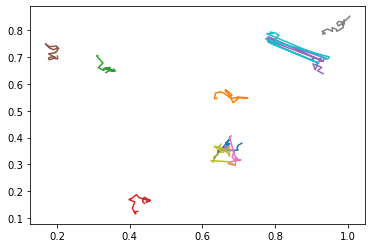

In [10]:
for trck in tracks:
    plt.plot(trck.x,trck.y)

In [21]:
with napari.gui_qt():
    viewer = napari.Viewer()
    viewer.add_tracks(data, properties=properties, graph=graph, name='tracks')

/home/jakub/.local/lib/python3.8/site-packages/napari/_qt/qt_event_loop.py:255: FutureWarning: 
The 'gui_qt()' context manager is deprecated.
If you are running napari from a script, please use 'napari.run()' as follows:

    import napari

    viewer = napari.Viewer()  # no prior setup needed
    # other code using the viewer...
    napari.run()

In IPython or Jupyter, 'napari.run()' is not necessary. napari will automatically
start an interactive event loop for you: 

    import napari
    viewer = napari.Viewer()  # that's it!

  warn(
/home/jakub/.local/lib/python3.8/site-packages/napari/_vispy/vispy_camera.py:109: RuntimeWarning: divide by zero encountered in true_divide
  zoom = np.min(canvas_size / scale)
